In [ ]:
import tensorflow as tf

# Normal DNN

In [14]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4989 - accuracy: 0.8229
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3701 - accuracy: 0.8681
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3350 - accuracy: 0.8780
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3108 - accuracy: 0.8862
Epoch 5/5
313/313 [==============================] - 0s 851us/step - loss: 0.3429 - accuracy: 0.8778


# Now with Convolutions and Pooling

In [63]:
# the convolution layer expects a tensor so we reshap the len() = 60000 shape 28x28 list into a single 4D list of shape (60000, 28, 28, 1)
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

class StopModelCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') >= 0.93:
            print("\nReached 93% validation accuracy... stopping training")
            self.model.stop_training = True
    # def on_batch_end(self, batch, logs={}):
    #     if logs.get('accuracy') >= 0.98:
    #         print("\nReached 98% train accuracy... stopping training")
    #         self.model.stop_training = True

callbacks = StopModelCallback()

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(
    training_images,
    training_labels,
    epochs=5,
    callbacks=[callbacks],
    validation_data=(test_images, test_labels)
)
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_90 (Dense)             (None, 256)             

In [61]:
import matplotlib.pyplot as plt

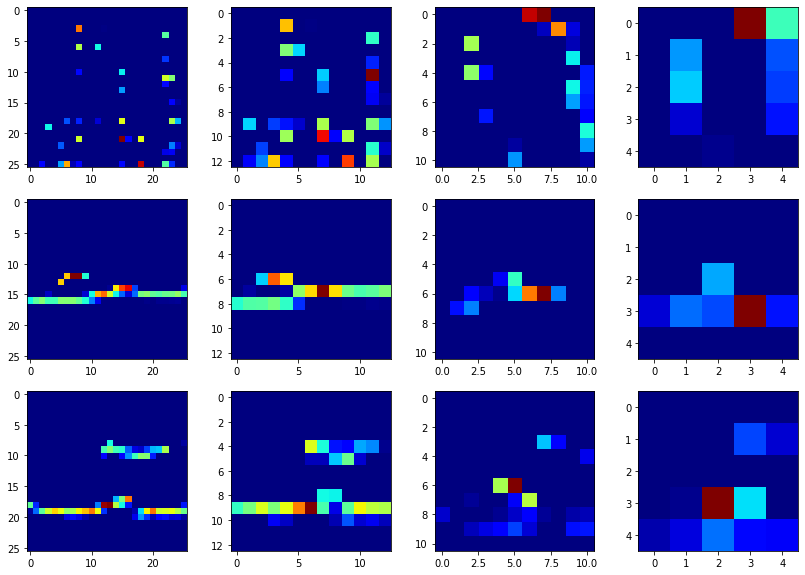

In [62]:
f, ax_arr = plt.subplots(3, 4, figsize=(14, 10))
FIRST_IMAGE = 7
SECOND_IMAGE = 8
THIRD_IMAGE = 23
CONVOLUTION_NUMBER = 3

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    ax_arr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='jet')
    ax_arr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    ax_arr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='jet')
    ax_arr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    ax_arr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='jet')
    ax_arr[2,x].grid(False)